# 机器学习练习 1 - 线性回归

## 单变量线性回归

In [1]:
# 国际惯例，先导入相应的包，并且重命名
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt      

In [2]:
data = pd.read_csv('ex1/ex1data1.txt', names=['population', 'profit'])  # 加载数据
data.head()    # 看下data长什么样子

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()    # 看下数据的整体情况

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


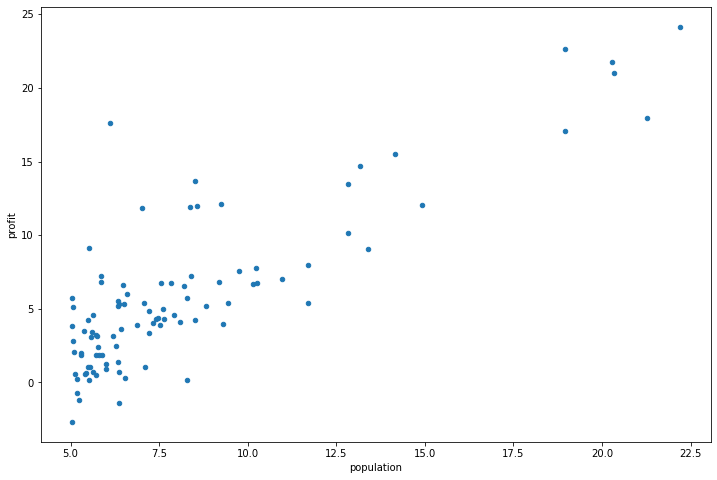

In [4]:
data.plot(kind='scatter', x='population', y='profit', figsize=(12,8))  # 绘制数据并指定x轴和y轴，figsize指定图像尺寸（单位为英寸）
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$$\\{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}} $$

In [5]:
def computeCost(X, y, theta):
    # 在上面的h(x)函数中是 theta.T*X ,但是在此处却变成了 X*theta.T
    # 因为X是 n*1 纬的向量，在上述公式中的theta是 n*1 纬的向量（参见视频4-1 8分2秒处），视频中要得到一个 1*1 的向量，所以是theta.T*X
    # 而此处我们要得到 n*1 的向量和y做运算， 所以theta是 1*n 的向量（可以参见后面的代码） 
    inner = np.power(((X * theta.T) - y), 2)    
    return np.sum(inner) / (2 * len(X))

考虑到截距项θ0，所以我们需要在数据上额外增加一列1：

In [6]:
data.insert(0, 'ones', 1)    # 在data中增加一列，其中0为列的索引，one为列名，1为值
data.head()    # 看下现在的data

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


现在我们来做一些变量初始化。

In [7]:
# 设置训练集
X = data.loc[:, ['ones', 'population']]  # X表示输入变量
y = data.loc[:, ['profit']]  # 表示目标变量

In [8]:
X.head()  # 看下X的样子

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()  # 看下y的样子

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
# theta = np.matrix(np.array([0,0]))
theta = np.matrix(np.array([0, 0]))

theta 是一个 1*2 矩阵

In [11]:
theta

matrix([[0, 0]])

看下维度

In [12]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [13]:
computeCost(X, y, theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

求导后得：

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}{{{\left(\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)x_j^{(i)}\right)}}}$$

In [14]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])    # 获得参数theta的总个数，ravel()为扁平化函数
    history_cost = np.zeros(iters)    # 记录每一次迭代产生的代价值
    
    # iters表示迭代次数
    for i in range(iters):
        error = (X * theta.T) - y    # 表示预测值与实际值之间的误差，对应上式中的 h(x) - y
        
        # 遍历每个θ
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        history_cost[i] = computeCost(X, y, theta)

    return theta, history_cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [15]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [16]:
g, history_cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [17]:
computeCost(X, y, g)

4.515955503078912

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

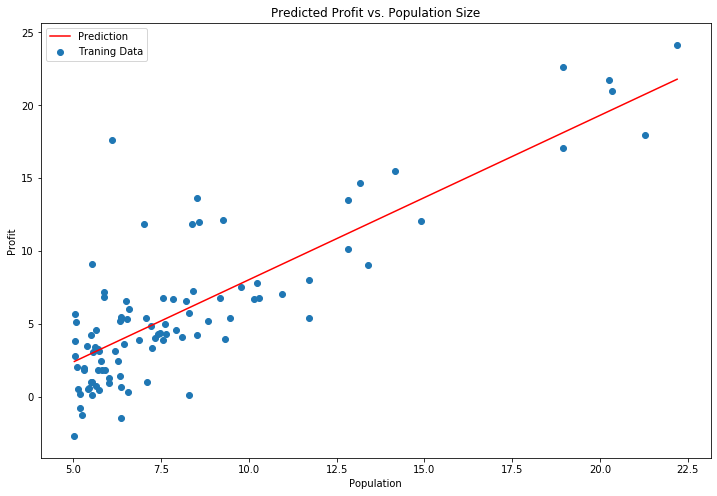

In [18]:
x = np.linspace(data.population.min(), data.population.max(), 100)  # 准备绘制直线的x轴数据
f = g[0, 0] + (g[0, 1] * x)  # 通过假设函数h(x)，输入x计算直线y轴的值

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')  # 绘制直线
ax.scatter(data.population, data.profit, label='Traning Data')  # 绘制散点图
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

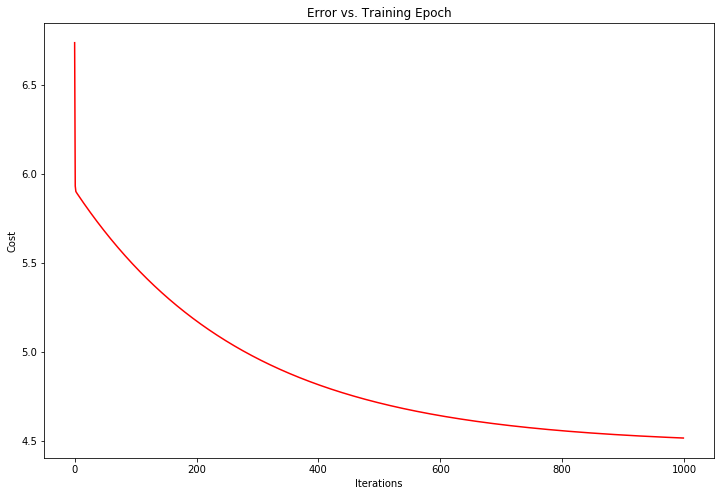

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), history_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [20]:
path = 'ex1/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()    

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [21]:
data2 = (data2 - data2.mean()) / data2.std()    # mean()方法计算平均值，std()方法计算标准差
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [22]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
X2 = data2.loc[:, ['Ones', 'Size', 'Bedrooms']]
y2 = data2.loc[:, ['Price']]

X2.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [23]:
y2.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [24]:
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, history_cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

我们也可以快速查看这一个的训练进程。

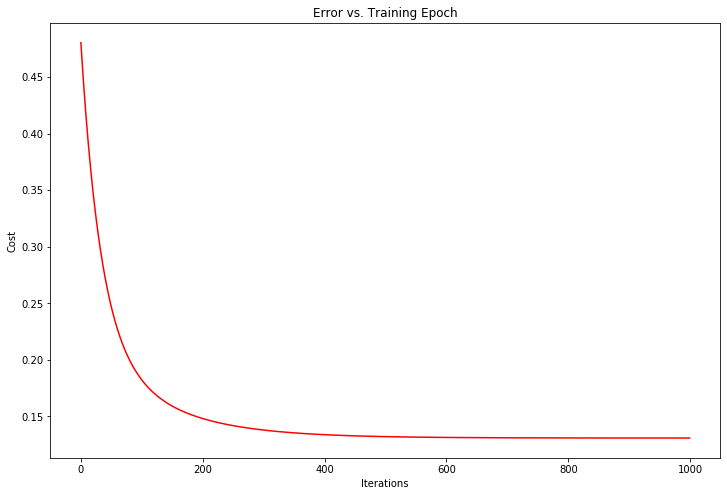

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), history_cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

scikit-learn model的预测表现

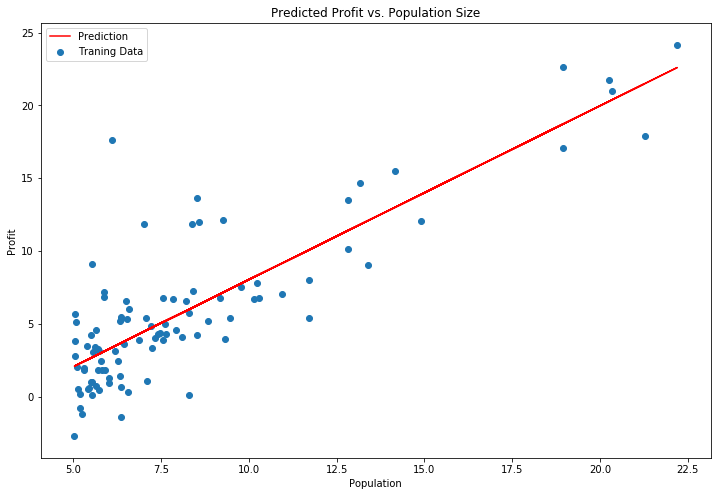

In [27]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [28]:
# 正规方程
def normalEqn(X, y):
    # linalg模块包含线性代数的函数，inv()函数计算逆矩阵
    theta = np.linalg.inv(X.T@X)@X.T@y    #X.T@X等价于X.T.dot(X)
    return theta

In [29]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [30]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])